In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
best_X = pd.read_pickle('best_X.pkl')
good_X = pd.read_pickle('good_X.pk2')
all_X = pd.read_pickle('all_X.pk3')
scaled_y = pd.read_pickle('scaled_y.pk4')

#### Using all_X (all features)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-

{'learning_rate': 0.01, 'n_estimators': 10}
GridSearchSV Score: 0.4562647754137116
              precision    recall  f1-score   support

         0.0       0.54      0.98      0.70        46
         1.0       0.00      0.00      0.00        60
         2.0       0.52      0.63      0.57        65
         3.0       0.35      0.75      0.48        53
         4.0       0.00      0.00      0.00        63
         5.0       0.00      0.00      0.00        69
         6.0       0.45      1.00      0.62        67

    accuracy                           0.46       423
   macro avg       0.27      0.48      0.34       423
weighted avg       0.25      0.46      0.32       423

Accuracy:  0.4562647754137116


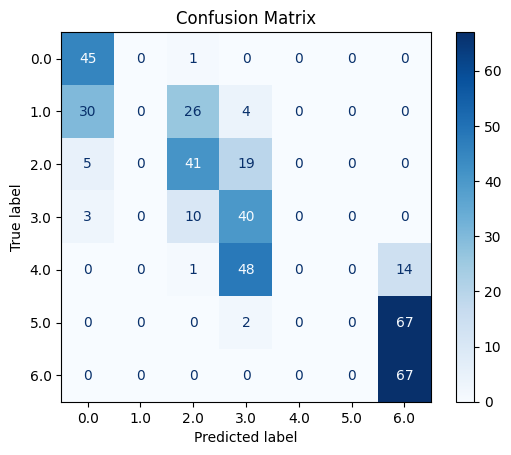

In [16]:
X_train, X_test, y_train, y_test = train_test_split(all_X, scaled_y, test_size = 0.2, random_state=1234)

# hyperparameter tuning with GridSearchCv
params = {'n_estimators': [10, 50, 100],
          'learning_rate': [0.01, 0.1, 0.5]
          }

grid = GridSearchCV(AdaBoostClassifier(), params, cv=10, scoring='accuracy', return_train_score=False)
grid = grid.fit(X_train, y_train)

print(grid.best_params_)
print('GridSearchSV Score:', grid.score(X_test, y_test))

# plug in the best hyperparameters determined above
plain_dt_all = AdaBoostClassifier(n_estimators=10, learning_rate=0.01)

plain_dt_all = plain_dt_all.fit(X_train, y_train)

y_pred = plain_dt_all.predict(X_test)
y_pred_probas = plain_dt_all.predict_proba(X_test)

print(classification_report(y_test, y_pred)) # assumes 0.5 threshold as default
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=plain_dt_all.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Using good_X (good features)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-

{'learning_rate': 0.01, 'n_estimators': 10}
GridSearchSV Score: 0.4562647754137116
              precision    recall  f1-score   support

         0.0       0.54      0.98      0.70        46
         1.0       0.00      0.00      0.00        60
         2.0       0.52      0.63      0.57        65
         3.0       0.35      0.75      0.48        53
         4.0       0.00      0.00      0.00        63
         5.0       0.00      0.00      0.00        69
         6.0       0.45      1.00      0.62        67

    accuracy                           0.46       423
   macro avg       0.27      0.48      0.34       423
weighted avg       0.25      0.46      0.32       423

Accuracy:  0.4562647754137116


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-

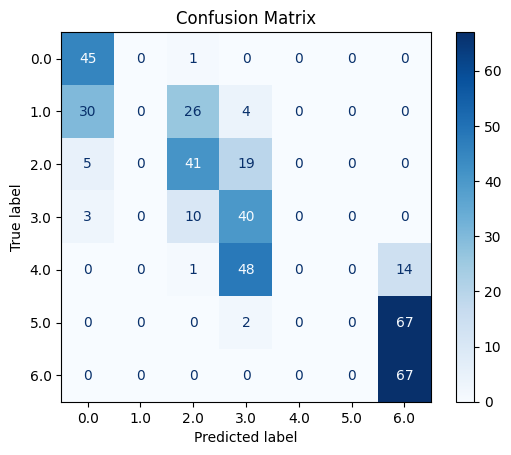

In [17]:
X_train, X_test, y_train, y_test = train_test_split(good_X, scaled_y, test_size = 0.2, random_state=1234)

# hyperparameter tuning with GridSearchCv
params = {'n_estimators': [10, 50, 100],
          'learning_rate': [0.01, 0.1, 0.5]
          }

grid = GridSearchCV(AdaBoostClassifier(), params, cv=10, scoring='accuracy', return_train_score=False)
grid = grid.fit(X_train, y_train)

print(grid.best_params_)
print('GridSearchSV Score:', grid.score(X_test, y_test))

# plug in the best hyperparameters determined above
plain_dt_good = AdaBoostClassifier(n_estimators=10, learning_rate=0.01)

plain_dt_good = plain_dt_good.fit(X_train, y_train)

y_pred = plain_dt_good.predict(X_test)
y_pred_probas = plain_dt_good.predict_proba(X_test)

print(classification_report(y_test, y_pred)) # assumes 0.5 threshold as default
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=plain_dt_good.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

#### Using best_X (best features)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-

{'learning_rate': 0.01, 'n_estimators': 10}
GridSearchSV Score: 0.4562647754137116
              precision    recall  f1-score   support

         0.0       0.54      0.98      0.70        46
         1.0       0.00      0.00      0.00        60
         2.0       0.52      0.63      0.57        65
         3.0       0.35      0.75      0.48        53
         4.0       0.00      0.00      0.00        63
         5.0       0.00      0.00      0.00        69
         6.0       0.45      1.00      0.62        67

    accuracy                           0.46       423
   macro avg       0.27      0.48      0.34       423
weighted avg       0.25      0.46      0.32       423

Accuracy:  0.4562647754137116


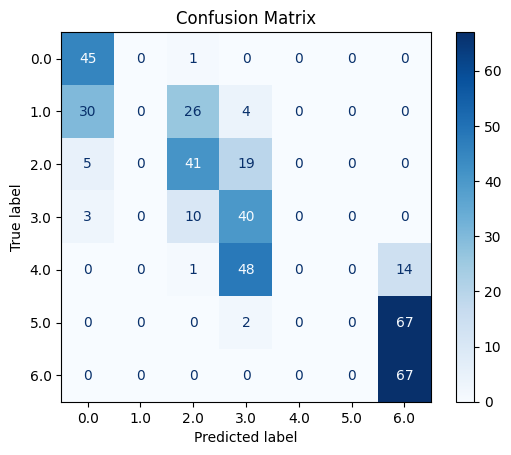

In [18]:
X_train, X_test, y_train, y_test = train_test_split(best_X, scaled_y, test_size = 0.2, random_state=1234)

# hyperparameter tuning with GridSearchCv
params = {'n_estimators': [10, 50, 100],
          'learning_rate': [0.01, 0.1, 0.5]
          }

grid = GridSearchCV(AdaBoostClassifier(), params, cv=10, scoring='accuracy', return_train_score=False)
grid = grid.fit(X_train, y_train)

print(grid.best_params_)
print('GridSearchSV Score:', grid.score(X_test, y_test))

# plug in the best hyperparameters determined above
plain_dt_best = AdaBoostClassifier(n_estimators=10, learning_rate=0.01)

plain_dt_best = plain_dt_best.fit(X_train, y_train)

y_pred = plain_dt_best.predict(X_test)
y_pred_probas = plain_dt_best.predict_proba(X_test)

print(classification_report(y_test, y_pred)) # assumes 0.5 threshold as default
print('Accuracy: ', accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=plain_dt_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()